/var/folders/c4/0_qk7vd14058g3ld598c7trc0000gn/T/ipykernel_16598/1442611846.py:56: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolor(x, y, w, shading='interp')


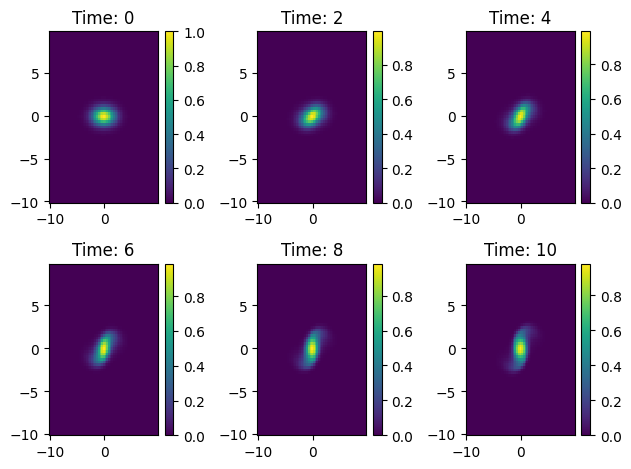

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from scipy.integrate import odeint

# Define parameters
tspan = np.arange(0, 12, 2)
nu = 0.001
Lx, Ly = 20, 20
nx, ny = 64, 64
N = nx * ny

# Define spatial domain and initial conditions
x2 = np.linspace(-Lx/2, Lx/2, nx + 1)
x = x2[:nx]
y2 = np.linspace(-Ly/2, Ly/2, ny + 1)
y = y2[:ny]
X, Y = np.meshgrid(x, y)
w = 1 * np.exp(-0.25 * X**2 - Y**2) + 1j * np.zeros((nx, ny))  # Initialize as complex

# Define spectral k values
kx = (2 * np.pi / Lx) * np.concatenate((np.arange(0, nx/2), np.arange(-nx/2, 0)))
kx[0] = 1e-6
ky = (2 * np.pi / Ly) * np.concatenate((np.arange(0, ny/2), np.arange(-ny/2, 0)))
ky[0] = 1e-6
KX, KY = np.meshgrid(kx, ky)
K = KX**2 + KY**2

# Define the ODE system
def spc_rhs(wt2, t, nx, ny, N, KX, KY, K, nu):
    wtc = wt2[0:N] + 1j*wt2[N:]
    wt = wtc.reshape((nx, ny)) 
    psit = -wt / K
    psix = np.real(ifft2(1j * KX * psit))
    psiy = np.real(ifft2(1j * KY * psit))
    wx = np.real(ifft2(1j * KX * wt))
    wy = np.real(ifft2(1j * KY * wt))
    rhs = (-nu * K * wt + fft2(wx * psiy - wy * psix)).reshape(N)
    return np.hstack([np.real(rhs),np.imag(rhs)])

# Solve the ODE and plot the results
wt0= np.hstack([np.real(fft2(w).reshape(N)),np.imag(fft2(w).reshape(N))])
wtsol = odeint(spc_rhs, wt0, tspan, args=(nx, ny, N, KX, KY, K, nu))

for j, t in enumerate(tspan):
    w = np.real(ifft2(wtsol[j,:N].reshape((nx, ny))))
    plt.subplot(2, 3, j + 1)
    plt.pcolor(x, y, w, shading='interp')
    plt.title(f'Time: {t}')
    plt.colorbar()

plt.tight_layout()
plt.show()
